# Imports

In [13]:
import os
import json
import csv
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
#from IUCN_API.modules.Groups import Groups
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options 
import time

In [2]:
def read_unique_lines_from_directory(directory_path):
    unique_lines = set()  # Usar um set para evitar duplicatas

    # Percorrer o diretório
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(".txt"):  # Processar apenas arquivos de texto
                file_path = os.path.join(root, file)
                
                # Abrir e ler o arquivo
                with open(file_path, 'r', encoding='utf-8') as f:
                    for line in f:
                        unique_lines.add(line.strip())  # Adicionar linha sem espaços

    # Converter o set em uma lista
    return list(unique_lines)

In [3]:
def save_unique_lines_to_file(unique_lines, output_file_path):
    with open(output_file_path, 'w', encoding='utf-8') as f:
        for line in unique_lines:
            f.write(line + '\n')

In [7]:
directory = "ids"
unique_lines = read_unique_lines_from_directory(directory)
print("Tamanho:", len(unique_lines))
# Exibindo as linhas únicas
for line in unique_lines:
    print(line)

Tamanho: 3615
191624
168310687
30595
158457
180448143
39842
39737
135333
37071
41673
92252537
152330878
180447858
35488
135360
39428
37115
162249
34077
194523
37162
33156
162402
39856
136859
191554
196580086
62076544
180450153
47348233
32147
37094
37135
40117
44347
157991706
169301315
95596261
37842
44721
33081
37570
165116
32277
121972516
180448182
80222939
165269
31029
185425319
175537718
180531198
92252747
194832
202869103
32946
34166
120942907
158448
44343
37284
136898
205910256
202236
180529385
193949
39093
196579697
180449048
158447
37500
165536
198355
16577345
202851491
9677
32499
74491261
183099
4565
84496815
103290570
34282
31192
179926
35562
13664
12756
97910770
41762
136891
180531230
179962
42683
92252770
35443
133710
98392092
39926
135369
42592
39558
158413
135332
35773
203375
39724
37545
19431
180531775
38006
33133
136862
37535
57482073
33488
44390
32469
180044
101537053
35090
183110
216648437
38509
34430
136897
37447
135363
63207
211
36418
180032
9557
17014
36113
46509530

In [9]:
output_file = "idssub.txt"
save_unique_lines_to_file(unique_lines, output_file)

In [4]:
def read_and_concatenate_json(directory_path, output_file_path):
    all_data = set()  # Usar um set para remover duplicatas

    # Percorrer o diretório
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(".json"):  # Processar apenas arquivos JSON
                file_path = os.path.join(root, file)
                
                # Abrir e ler o arquivo JSON
                with open(file_path, 'r', encoding='utf-8') as f:
                    try:
                        data = json.load(f)
                        # Adicionar os dados ao set (converte os dados em strings para evitar duplicatas)
                        all_data.add(json.dumps(data, sort_keys=True))
                    except json.JSONDecodeError as e:
                        print(f"Erro ao ler o arquivo JSON: {file_path} - Exception {e}")
    
    # Converter o set de strings de volta para uma lista de objetos JSON
    unique_data = [json.loads(item) for item in all_data]

    # Salvar o resultado no arquivo de saída
    with open(output_file_path, 'w', encoding='utf-8') as out_file:
        json.dump(unique_data, out_file, indent=4)

In [5]:
def read_and_concatenate_json_lines(directory_path, output_file_path):
    all_data = set()  # Usar um set para remover duplicatas

    # Percorrer o diretório
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(".json"):  # Processar apenas arquivos JSON
                file_path = os.path.join(root, file)
                
                # Abrir e ler o arquivo JSON
                with open(file_path, 'r', encoding='utf-8') as f:
                    for line in f:  # Ler linha por linha
                        try:
                            data = json.loads(line)
                            # Adicionar os dados ao set (converte os dados em strings para evitar duplicatas)
                            all_data.add(json.dumps(data, sort_keys=True))
                        except json.JSONDecodeError as e:
                            print(f"Erro ao ler o JSON: {e} no arquivo {file_path}")

    # Salvar cada objeto JSON em uma linha separada no formato JSON Lines
    with open(output_file_path, 'w', encoding='utf-8') as out_file:
        for item in all_data:
            out_file.write(item + '\n') 

In [14]:
directory = "full"
output_json_file = "assessements.json"
read_and_concatenate_json_lines(directory, output_json_file)

In [2]:
def json_to_dataframe(json_file):
    # Lista para armazenar os objetos
    data = []
    
    # Abre o arquivo JSON
    with open(json_file, 'r') as file:
        # Lê cada linha como um objeto JSON
        for line in file:
            # Converte a linha JSON em um dicionário Python
            data.append(json.loads(line))
    
    # Normaliza os dados para transformar colunas aninhadas em colunas separadas
    df = pd.json_normalize(data)
    
    return df

In [3]:
json_file = 'assessements.json'
df = json_to_dataframe(json_file)
#print(df)

                                                locations red_list_category  \
0       [{'country': 'Zimbabwe', 'presence': 'Extant'}...                LC   
1       [{'country': 'Peru', 'presence': 'Extant'}, {'...                LC   
2       [{'country': 'Paraguay', 'presence': 'Extant'}...                NR   
3       [{'country': 'Togo', 'presence': 'Extant'}, {'...                LC   
4       [{'country': 'Ogasawara-shoto', 'presence': 'E...                DD   
...                                                   ...               ...   
320979  [{'country': 'Rondônia', 'presence': 'Extant'}...                EN   
320980  [{'country': 'Sicilia', 'presence': 'Extant'},...                EN   
320981  [{'country': 'Solomon Islands', 'presence': 'E...                LC   
320982                                                 []                 E   
320983  [{'country': 'Lao People's Democratic Republic...             LR/lc   

                                                  t

In [4]:
valores_unicos = df['taxon.sis_id'].unique()

# Converte o resultado para uma lista
lista_valores_unicos = list(valores_unicos)
print(lista_valores_unicos, len(lista_valores_unicos))

[146223165, 22724305, 22733165, 190168, 12741, 22710354, 15873, 78586709, 145396571, 22696894, 189019073, 22718444, 56384, 22690676, 165873, 61079, 22691014, 30955, 139155285, 22709297, 58090, 193983816, 60485122, 22703063, 181568721, 43230, 224393737, 22700279, 22714654, 5042, 22695757, 88070007, 22723396, 22708756, 22716937, 158844746, 22684129, 31650, 173537, 22694313, 227961987, 115630856, 198632, 165794, 38655, 22709207, 153320764, 22707788, 22700365, 22687066, 42564343, 22720062, 165487, 155991, 22685606, 18962, 163675, 22714874, 22730603, 133305, 32490, 186664, 47263352, 149163975, 55863, 158678176, 202536217, 22682655, 33747, 22681929, 101534395, 167840, 20518688, 152208, 103818359, 22682196, 12913, 30926, 22691037, 22732755, 58127323, 102819446, 22701643, 22686268, 147478925, 6313, 3334, 189439, 143322835, 155107, 156106803, 8951, 22731897, 70463513, 195347, 102998975, 58126, 202413, 103672251, 22703874, 22691694, 64529326, 202068, 241132619, 98418178, 145687128, 59153, 227040

In [5]:
def rename_uses(df):
    valid_uses = ['Pets/display animals, horticulture', 
                  'Sport hunting/specimen collecting', 
                  'Construction or structural materials', 
                  'Fuels',
                  'Medicine - human & veterinary', 
                  'Research',
                  'Handicrafts, jewellery, etc.',
                  'Wearing apparel, accessories']
    for i in range(len(df)):
        uses = df.iloc[i]['use_and_trade']
        new_uses = []
        for use in uses:
            if use == "Unknown" and len(uses) <= 1:
                new_uses = ["Unknown"]
            elif use in valid_uses:
                new_uses.append(use)
            elif use == "Food - human" or use == "Food - animal":
                if "Food" not in new_uses:
                    new_uses.append("Food")
            elif use == 'Manufacturing chemicals' or use == 'Other chemicals':
                if 'Chemicals' not in new_uses:
                    new_uses.append('Chemicals')
            else:
                if 'Others' not in new_uses:
                    new_uses.append('Others')
        if len(uses) == 0:
            new_uses = ["Unknown"]
        df.at[i, 'use_and_trade'] = new_uses
    #return df

In [6]:
rename_uses(df)
display(df)

,locations,red_list_category,threats,use_and_trade,year_published,taxon.class_name,taxon.family_name,taxon.kingdom_name,taxon.order_name,taxon.phylum_name,taxon.scientific_name,taxon.sis_id
0,"[{'country': 'Zimbabwe', 'presence': 'Extant'}...",LC,[],[Unknown],2019,MAGNOLIOPSIDA,BURSERACEAE,PLANTAE,SAPINDALES,TRACHEOPHYTA,Commiphora glandulosa,146223165
1,"[{'country': 'Peru', 'presence': 'Extant'}, {'...",LC,[],"[Pets/display animals, horticulture]",2018,AVES,ICTERIDAE,ANIMALIA,PASSERIFORMES,CHORDATA,Dives warczewiczi,22724305
2,"[{'country': 'Paraguay', 'presence': 'Extant'}...",NR,[],[Unknown],2000,AVES,BUCCONIDAE,ANIMALIA,PICIFORMES,CHORDATA,Notharchus swainsoni,22733165
3,"[{'country': 'Togo', 'presence': 'Extant'}, {'...",LC,[],[Food],2015,ACTINOPTERYGII,MUGILIDAE,ANIMALIA,MUGILIFORMES,CHORDATA,Mugil curema,190168
4,"[{'country': 'Ogasawara-shoto', 'presence': 'E...",DD,[],[Unknown],1996,GASTROPODA,CAMAENIDAE,ANIMALIA,STYLOMMATOPHORA,MOLLUSCA,Mandarina aureola,12741
...,...,...,...,...,...,...,...,...,...,...,...,...
320979,"[{'country': 'Rondônia', 'presence': 'Extant'}...",EN,"[Agro-industry grazing, ranching or farming, U...",[Unknown],2021,ACTINOPTERYGII,RIVULIDAE,ANIMALIA,CYPRINODONTIFORMES,CHORDATA,Anablepsoides luitalimae,173823654
320980,"[{'country': 'Sicilia', 'presence': 'Extant'},...",EN,"[Recreational activities, Tourism & recreation...",[Unknown],2016,INSECTA,ACRIDIDAE,ANIMALIA,ORTHOPTERA,ARTHROPODA,Sphingonotus personatus,16084535
320981,"[{'country': 'Solomon Islands', 'presence': 'E...",LC,[],"[Handicrafts, jewellery, etc., Sport hunting/s...",2013,GASTROPODA,CONIDAE,ANIMALIA,NEOGASTROPODA,MOLLUSCA,Conus biliosus,192420
320982,[],E,[],[Unknown],1986,MAMMALIA,CERCOPITHECIDAE,ANIMALIA,PRIMATES,CHORDATA,Mandrillus leucophaeus,12753


In [7]:
dict_uses_id = {}
for i in range(len(valores_unicos)):
    filtered_df = df[df['taxon.sis_id'] == valores_unicos[i]]
    maxx = []
    for j in range(len(filtered_df)):
        temp = filtered_df.iloc[j]['use_and_trade']
        if len(temp) > len(maxx):
            maxx = temp
    dict_uses_id[valores_unicos[i]] = maxx
#print(dict_uses_id)

In [8]:
dict_countries_id = {}
for i in range(len(valores_unicos)):
    filtered_df = df[df['taxon.sis_id'] == valores_unicos[i]]
    maxx = []
    for j in range(len(filtered_df)):
        temp = filtered_df.iloc[j]['locations']
        if len(temp) > len(maxx):
            maxx = temp
    dict_countries_id[valores_unicos[i]] = maxx


In [9]:
keys = list(dict_countries_id.keys())
countries = list(dict_countries_id.values())
country = "Montenegro"
ids = []
for i in range(len(keys)):
    array = countries[i]
    for j in range(len(array)):
        if array[j]["country"] == country:
            ids.append(keys[i])
print(ids)

[15873, 22696894, 181568721, 22714654, 22716937, 22694313, 22720062, 22682655, 164156, 158689, 22693150, 22688927, 1904, 147321622, 22680003, 149164255, 86806556, 33460, 171730, 22696495, 22680465, 22718307, 164391, 104317670, 84711952, 63131, 22680391, 22716901, 161959, 103874024, 22692913, 22693468, 103818789, 22680423, 23062, 198669, 22693749, 3746, 22708286, 22720638, 103761494, 165523, 1898, 13356661, 8643, 22711234, 22694160, 86200688, 87576297, 22979, 149163589, 161092, 22720881, 83662840, 158684, 22689714, 8644, 168962, 16084490, 45354964, 135606, 172056, 33951, 22693093, 22694938, 22693247, 86186413, 167857, 198642, 22695072, 22706068, 22734928, 22694764, 22710308, 157625, 4973, 171532, 22694136, 176110, 39255, 19877, 170705, 198603, 42546, 22695231, 170981, 198724, 63120, 22680358, 22696060, 22693220, 47113126, 149163892, 22693431, 194078, 44710000, 22705095, 22734216, 22689507, 87468077, 155479, 170896, 60127, 22693052, 61695117, 162557, 162075, 194854, 22725022, 22718617, 8

In [11]:
dict_uses = {'Pets/display animals, horticulture': 0,
             'Sport hunting/specimen collecting': 0,
             'Construction or structural materials': 0,
             'Food': 0,
             'Chemicals': 0,
             'Others': 0,
             'Fuels': 0,
             'Medicine - human & veterinary': 0,
             'Research': 0,
             'Handicrafts, jewellery, etc.': 0,
             'Wearing apparel, accessories': 0}
for idd in ids:
    uses = dict_uses_id[idd]
    for use in uses:
        if use in dict_uses:
            dict_uses[use] += 1
print(dict_uses)

{'Pets/display animals, horticulture': 565, 'Sport hunting/specimen collecting': 359, 'Construction or structural materials': 60, 'Food': 734, 'Chemicals': 46, 'Others': 282, 'Fuels': 43, 'Medicine - human & veterinary': 281, 'Research': 66, 'Handicrafts, jewellery, etc.': 49, 'Wearing apparel, accessories': 27}


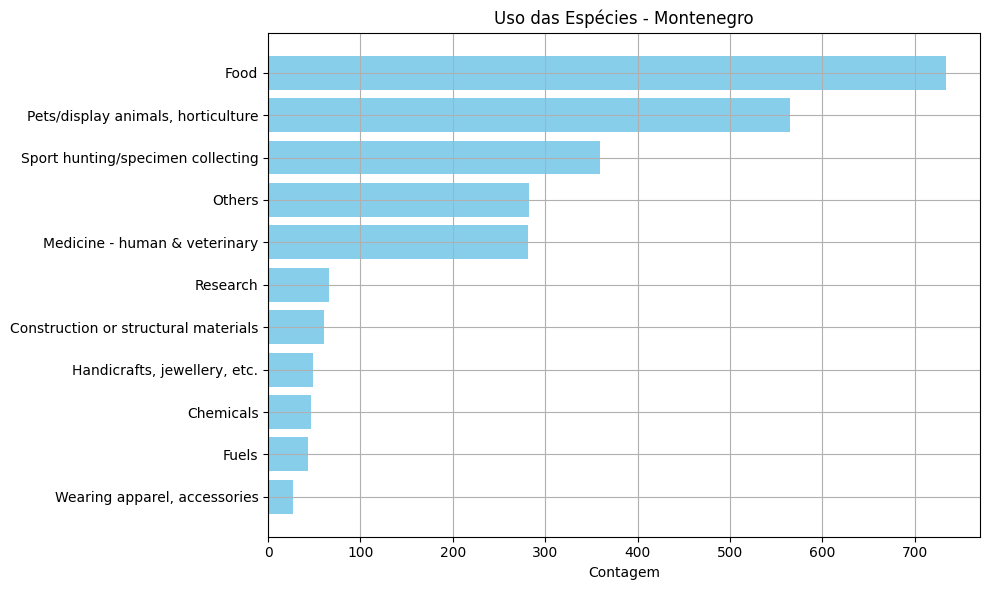

In [19]:
sorted_data = dict(sorted(dict_uses.items(), key=lambda item: item[1]))
categories = list(sorted_data.keys())
values = list(sorted_data.values())

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.barh(categories, values, color='skyblue')
plt.xlabel('Contagem')
plt.title(f'Uso das Espécies - {country}')
plt.tight_layout()
plt.grid()

# Display the plot
plt.savefig("usos.png")
plt.show()

In [4]:
countries = set()
for i in range(len(df)):
    value = df.iloc[i]["locations"]
    for j in range(len(value)):
        countries.add(value[j]['country'])
        #if value[j] in list_uses:
        #    list_uses[value[j]] += 1
        #else:
        #    list_uses[value[j]] = 1
        #total += 1
print(countries)

{'Oklahoma', 'Pondicherry', 'Abkhaziya', 'Aisén', 'Australia', 'Yucatán', 'Cyprus', 'Espírito Santo', 'Santiago', 'Seychelles (main island group)', 'São Paulo', 'Primoryi', 'Brunei Darussalam', 'Santa Cruz', 'Assam', 'Alagoas', 'Missouri', 'Hunan', 'Malawi', 'Karachaevo-Cherkessiya', 'Pakistan', 'Sudan', 'Bonaire', 'Delaware', 'Disputed Territory', 'Myanmar (mainland)', 'Northern Mariana Islands', 'Bali', 'New York', 'Veracruz', 'Stavropol', 'Kerala', 'Malpelo I.', 'New Mexico', 'Kuwait', 'Adzhariya', 'Eastern Asian Russia', 'Mali', 'Uttaranchal', 'Guerrero', 'Egypt (African part)', 'Congo', 'Dadra-Nagar-Haveli', 'Bulgaria', 'Colorado', 'North European Russia', 'Sumatera', 'Nicobar Is.', 'Johnston I.', 'Rio Grande do Norte', 'Guatemala', 'Iowa', 'Honshu', 'Macquarie Is.', 'Japan', 'Nagaland', 'Burundi', 'Trindade', 'Jawa', 'Belgium', 'Amapá', 'Kermadec Is.', 'Malta', 'Papua New Guinea', 'Cocos (Keeling) Islands', 'Aruba', 'Hungary', 'Sardegna', 'Tocantins', 'Macao', 'Somalia', 'Iran, I

In [6]:
list_uses = dict()
total = 0
total_real = len(df)
for i in range(len(df)):
    value = df.iloc[i]["use_and_trade"]
    for j in range(len(value)):
        if value[j] in list_uses:
            list_uses[value[j]] += 1
        else:
            list_uses[value[j]] = 1
        total += 1

print(list_uses, len(list_uses))
print("Total de assessements com dados de uso:", total)
print("Total de assessements sem dados de uso:", total_real - total)

{'Pets/display animals, horticulture': 51527, 'Food - human': 34377, 'Sport hunting/specimen collecting': 7105, 'Construction or structural materials': 6334, 'Other household goods': 2691, 'Fuels': 2697, 'Unknown': 1252, 'Medicine - human & veterinary': 7219, 'Establishing ex-situ production *': 2381, 'Other (free text)': 1994, 'Research': 1320, 'Food - animal': 2387, 'Handicrafts, jewellery, etc.': 2744, 'Fibre': 662, 'Wearing apparel, accessories': 1134, 'Other chemicals': 779, 'Poisons': 274, 'Manufacturing chemicals': 308} 18
Total de assessements com dados de uso: 127185
Total de assessements sem dados de uso: 193799


In [4]:
ids = []
#print(len(df))
for i in range(len(df)):
    value = df.iloc[i]["use_and_trade"]
    #print(value)
    if 'Handicrafts, jewellery, etc.' in value:
        ids.append(i)
#print(ids)

In [5]:
pd.set_option('display.max_rows', 1000)

In [6]:
new_df = df.loc[ids]
print(len(new_df))
for j in range(len(new_df)):
    print(new_df.iloc[j]["use_and_trade"])

#display(new_df)

,locations,red_list_category,threats,use_and_trade,year_published,taxon.class_name,taxon.family_name,taxon.kingdom_name,taxon.order_name,taxon.phylum_name,taxon.scientific_name,taxon.sis_id
353,"[{'country': 'Philippines', 'presence': 'Extan...",LC,"[Scale Unknown/Unrecorded, Housing & urban are...","[Construction or structural materials, Other h...",2020,MAGNOLIOPSIDA,FABACEAE,PLANTAE,FABALES,TRACHEOPHYTA,Archidendron scutiferum,153508188
390,"[{'country': 'Vermont', 'presence': 'Extant'},...",LC,[],"[Establishing ex-situ production *, Constructi...",2013,PINOPSIDA,PINACEAE,PLANTAE,PINALES,TRACHEOPHYTA,Larix laricina,42313
472,"[{'country': 'Taiwan, Province of China', 'pre...",EN,"[Intentional use: (large scale) [harvest], Oth...","[Medicine - human & veterinary, Food - human, ...",2019,MEROSTOMATA,LIMULIDAE,ANIMALIA,XIPHOSURA,ARTHROPODA,Tachypleus tridentatus,21309
589,"[{'country': 'Salta', 'presence': 'Extant'}, {...",EN,[Intentional use (species is the target)],"[Handicrafts, jewellery, etc.]",2013,MAGNOLIOPSIDA,CACTACEAE,PLANTAE,CARYOPHYLLALES,TRACHEOPHYTA,Parodia penicillata,152732
619,"[{'country': 'Querétaro', 'presence': 'Extant'...",NT,"[Agro-industry farming, Housing & urban areas,...","[Wearing apparel, accessories, Handicrafts, je...",2020,MAGNOLIOPSIDA,APOCYNACEAE,PLANTAE,GENTIANALES,TRACHEOPHYTA,Cascabela thevetioides,136751227
...,...,...,...,...,...,...,...,...,...,...,...,...
319324,"[{'country': 'Peru', 'presence': 'Extant'}, {'...",VU,"[Agro-industry farming, Agro-industry grazing,...","[Medicine - human & veterinary, Handicrafts, j...",2014,AVES,RAMPHASTIDAE,ANIMALIA,PICIFORMES,CHORDATA,Ramphastos culminatus,22726239
319445,"[{'country': 'Hong Kong', 'presence': 'Extant'...",EN,"[Intentional use (species is the target), Tour...","[Pets/display animals, horticulture, Handicraf...",1994,AVES,ARDEIDAE,ANIMALIA,PELECANIFORMES,CHORDATA,Egretta eulophotes,22696977
320798,"[{'country': 'Ethiopia', 'presence': 'Extant'}...",LC,[Intentional use (species is the target)],"[Handicrafts, jewellery, etc.]",2023,LILIOPSIDA,ASPARAGACEAE,PLANTAE,ASPARAGALES,TRACHEOPHYTA,Dracaena ellenbeckiana,231497907
320859,"[{'country': 'Hawaiian Is.', 'presence': 'Exta...",EN,[Intentional use: (subsistence/small scale) [h...,"[Other chemicals, Handicrafts, jewellery, etc....",2016,MAGNOLIOPSIDA,SANTALACEAE,PLANTAE,SANTALALES,TRACHEOPHYTA,Santalum freycinetianum,62929


In [ ]:
display(new_df)

'Pets/display animals, horticulture' - ok
'Sport hunting/specimen collecting' - ok
'Construction or structural materials' - ok
'Food' = 'Food - human' + 'Food - animal' - ok
'Fuels' - ok
'Chemicals' = 'Manufacturing chemicals' + 'Other chemicals' - ok
'Medicine - human & veterinary' - ok
'Research' - ok
'Handicrafts, jewellery, etc.' - ok
'Wearing apparel, accessories' - ok
Other = 'Other (free text)' + 'Poison' + 'Fibre' + 'Establishing ex-situ production *' + 'Other household goods'
'Establishing ex-situ production *'
'Poisons'
'Fibre'
'Other (free text)'
'Other household goods'
'Unknown' = 'Unknown'

In [11]:
list_uses = dict()
total = 0
total_real = len(df)
for i in range(len(df)):
    value = df.iloc[i]["use_and_trade"]
    for j in range(len(value)):
        if value[j] in list_uses:
            list_uses[value[j]] += 1
        else:
            list_uses[value[j]] = 1
        total += 1

print(list_uses, len(list_uses))
print("Total de assessements com dados de uso:", total)
print("Total de assessements sem dados de uso:", total_real - total)

{'Unknown': 235171, 'Pets/display animals, horticulture': 51527, 'Food': 35489, 'Sport hunting/specimen collecting': 7105, 'Construction or structural materials': 6334, 'Others': 7389, 'Fuels': 2697, 'Medicine - human & veterinary': 7219, 'Research': 1320, 'Handicrafts, jewellery, etc.': 2744, 'Wearing apparel, accessories': 1134, 'Chemicals': 1049} 12
Total de assessements com dados de uso: 359178
Total de assessements sem dados de uso: -38194


In [12]:
def compare_ids(text_file, dataframe):
    # Lê o arquivo de texto e armazena os IDs em uma lista
    with open(text_file, 'r') as file:
        ids_list = [line.strip() for line in file.readlines()]
    
    # Obtém os IDs do DataFrame (coluna taxon.sis_id)
    df_ids = dataframe['taxon.sis_id'].astype(str).tolist()  # Converte os IDs para string, se necessário
    
    # Encontra os IDs que estão no arquivo de texto, mas não no DataFrame
    missing_ids = [id_ for id_ in ids_list if id_ not in df_ids]
    
    return missing_ids

In [13]:
text_file = 'missing.txt'
missing_ids = compare_ids(text_file, df)

print("IDs que não estão no DataFrame:", missing_ids, len(missing_ids))

IDs que não estão no DataFrame: [] 0


In [9]:
def save_missing_ids(missing_ids, output_file):
    with open(output_file, 'w') as file:
        for id_ in missing_ids:
            file.write(f"{id_}\n")

In [10]:
output_file = 'other_missing.txt'
save_missing_ids(missing_ids, output_file)

In [10]:
print(len(missing_ids))

9483


In [6]:
display(df.head())

,locations,red_list_category,threats,use_and_trade,year_published,taxon.class_name,taxon.family_name,taxon.kingdom_name,taxon.order_name,taxon.phylum_name,taxon.scientific_name,taxon.sis_id
0,"[{'country': 'Malaysia', 'presence': 'Extant'}...",NR,[],[],2000,AVES,PITTIDAE,ANIMALIA,PASSERIFORMES,CHORDATA,Hydrornis schwaneri,22736530
1,"[{'country': 'Venezuela, Bolivarian Republic o...",LR/lc,[],[],2000,AVES,THAMNOPHILIDAE,ANIMALIA,PASSERIFORMES,CHORDATA,Thamnophilus melanonotus,22701263
2,"[{'country': 'Chihuahua', 'presence': 'Extant'...",DD,[],[],2016,MAGNOLIOPSIDA,MAGNOLIACEAE,PLANTAE,MAGNOLIALES,TRACHEOPHYTA,Magnolia tarahumara,193983
3,"[{'country': 'Kenya', 'presence': 'Extant'}, {...",LC,[Tourism & recreation areas],[],2020,MAGNOLIOPSIDA,OCHNACEAE,PLANTAE,MALPIGHIALES,TRACHEOPHYTA,Ochna thomasiana,158382
4,"[{'country': 'United States', 'presence': 'Ext...",LC,[],[],2018,MAGNOLIOPSIDA,ROSACEAE,PLANTAE,ROSALES,TRACHEOPHYTA,Crataegus douglasii,135957326


# Web Scrapping - Species IDs

In [2]:
def scroll_to_bottom(driver):
    # Obter a altura atual da página
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Rolar até o final da página
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Aguardar para que a página carregue o novo conteúdo
        time.sleep(2)  # Ajuste o tempo conforme necessário

        # Calcular nova altura da página e comparar com a altura anterior
        new_height = driver.execute_script("return document.body.scrollHeight")

        if new_height == last_height:
            break  # Se a altura não mudou, estamos no final da página
        last_height = new_height

# Chamar a função para rolar até o final da página


In [3]:
links = None
hrefs = []

In [7]:
#service = Service('caminho/para/o/chromedriver')  # Substitua pelo caminho do seu ChromeDriver
driver = webdriver.Firefox()

# Acessar a página desejada
url = 'https://www.iucnredlist.org/search/list?searchType=species'
#url = 'https://www.iucnredlist.org/search/list'
driver.get(url)


try:
    # Esperar até que o elemento <a> esteja presente e clicável
    element = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CLASS_NAME, "list-selected-filters__action"))
    )
    # Clicar no elemento <a>
    element.click()
    time.sleep(5)
    
except Exception as e:
    print("Erro ao tentar clicar no elemento:", e)

cont = 0    
    
# Repetir até que o botão "Show more" não esteja mais visível
while True:
    try:
        # Esperar até que o botão "Show more" esteja presente e visível
        show_more_button = WebDriverWait(driver, 1).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, "a.section__link-out[role='link']"))
        )
        #driver.execute_script("arguments[0].scrollIntoView();", show_more_button)
        scroll_to_bottom(driver)
        # Clicar no botão "Show more"
        show_more_button.click()

        # Aguarde um pouco para permitir que o conteúdo carregue
        time.sleep(1)
        scroll_to_bottom(driver)
        cont = 0
        #driver.execute_script("arguments[0].scrollIntoView();", show_more_button)
    except Exception as e:
        # Se não encontrar o botão, saímos do loop
        cont += 1
        if cont == 25:
            break
        print(e)
        print("Todos os elementos foram carregados ou ocorreu um erro.")
        #break
        
links = driver.find_elements(By.TAG_NAME, 'a')

# Extrair e imprimir os atributos 'href' de cada link
hrefs = []
for link in links:
    href = link.get_attribute('href')
    if href:  # Verifica se o href não é None
        hrefs.append(href)

# Fechar o navegador
driver.quit()

The geckodriver version (0.34.0) detected in PATH at /usr/bin/geckodriver might not be compatible with the detected firefox version (124.0.1); currently, geckodriver 0.35.0 is recommended for firefox 124.*, so it is advised to delete the driver in PATH and retry


Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:192:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:510:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

Todos os elementos foram carregados ou ocorreu um erro.
Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:192:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:510:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

Todos os elementos foram carregados ou ocorreu um erro.
Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:192:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:510:5
dom.find/</<@chrome

Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:192:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:510:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

Todos os elementos foram carregados ou ocorreu um erro.
Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:192:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:510:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

Todos os elementos foram carregados ou ocorreu um erro.
Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:192:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:510:5
dom.find/</<@chrome

Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:192:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:510:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

Todos os elementos foram carregados ou ocorreu um erro.
Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:192:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:510:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

Todos os elementos foram carregados ou ocorreu um erro.
Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:192:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:510:5
dom.find/</<@chrome

Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:192:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:510:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

Todos os elementos foram carregados ou ocorreu um erro.
Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:192:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:510:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

Todos os elementos foram carregados ou ocorreu um erro.
Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:192:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:510:5
dom.find/</<@chrome

Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:192:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:510:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

Todos os elementos foram carregados ou ocorreu um erro.
Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:192:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:510:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

Todos os elementos foram carregados ou ocorreu um erro.
Message: 
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:192:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:510:5
dom.find/</<@chrome

In [ ]:
hrefs = list(set(hrefs))
hrefs = [s.replace("\n", "") for s in hrefs]
hrefs = [s for s in hrefs if s[-1].isdigit()]

In [ ]:
print("Links encontrados:")
for href in hrefs:
    print(href)

In [8]:
print(len(hrefs))

135111


In [9]:
with open('id.txt', mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Escrever cada item da lista como uma nova linha no CSV
    for href in hrefs:
        writer.writerow([href])

In [12]:
lista_filtrada = [s for s in lista_limpada if s[-1].isdigit()]
print(len(lista_filtrada))

67380


In [13]:
with open('id.txt', mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Escrever cada item da lista como uma nova linha no CSV
    for href in lista_filtrada:
        writer.writerow([href])

In [3]:
list_url = []
with open('id.txt', 'r') as file:
    # Usa readlines() para ler todas as linhas e armazená-las em uma lista
    list_url = file.readlines()
list_url = [s.replace("\n", "") for s in list_url]

In [4]:
api_key = 'dtGz8X7FwcZkydaS3aCbd2uJ8kpM3GxUJNiE'

In [25]:
def get_all_sis_id(list_url, api_key):
    driver = webdriver.Firefox()
    base_url = 'https://api.iucnredlist.org/api-docs/index.html'
    #url = 'https://www.iucnredlist.org/search/list'
    driver.get(base_url)
    
    try:
    # Esperar até que o elemento <a> esteja presente e clicável
        element = WebDriverWait(driver, 5).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, ".btn.authorize.unlocked"))
        )
        # Clicar no elemento <a>
        element.click()
        time.sleep(2)

    except Exception as e:
        print("Erro ao tentar clicar no elemento:", e)
      
    try:
        input_element = driver.find_element(By.XPATH, "//input[@type='text']")
        input_element.send_keys(api_key)
        time.sleep(2)
    except Exception as e:
        print("Erro ao localizar ou preencher o input:", e)
        
    try:
    # Esperar até que o elemento <a> esteja presente e clicável
        element = WebDriverWait(driver, 2).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, ".btn.modal-btn.auth.authorize.button"))
        )
        # Clicar no elemento <a>
        element.click()
        time.sleep(2)

    except Exception as e:
        print("Erro ao tentar clicar no elemento:", e)
        
    try:
    # Esperar até que o elemento <a> esteja presente e clicável
        element = WebDriverWait(driver, 2).until(
            EC.element_to_be_clickable((By.CLASS_NAME, "close-modal"))
        )
        # Clicar no elemento <a>
        element.click()
        time.sleep(2)

    except Exception as e:
        print("Erro ao tentar clicar no elemento:", e)
        
    try:
    # Esperar até que o elemento <a> esteja presente e clicável
        element = WebDriverWait(driver, 2).until(
            EC.element_to_be_clickable((By.ID, "operations-Taxa-get_api_v4_taxa_sis__sis_id_"))
        )
        # Clicar no elemento <a>
        element.click()
        time.sleep(2)

    except Exception as e:
        print("Erro ao tentar abrir e clicar na caixa do get:", e)
        
    try:
    # Esperar até que o elemento <a> esteja presente e clicável
        element = WebDriverWait(driver, 2).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, ".btn.try-out__btn"))
        )
        # Clicar no elemento <a>
        element.click()
        time.sleep(2)

    except Exception as e:
        print("Erro ao tentar clicar no botão de try:", e)

    cont = 0
    for url in list_url:
        divided = url.split("/")
        idd = divided[-2]
        
        try:
            input_element = driver.find_element(By.XPATH, "//div[@id='operations-Taxa-get_api_v4_taxa_sis__sis_id_']//input[@type='text']")
            input_element.clear()
            input_element.send_keys(idd)
            time.sleep(2)
        except Exception as e:
            print("Erro ao localizar ou preencher o input:", e)
            
        try:
        # Esperar até que o elemento <a> esteja presente e clicável
            element = WebDriverWait(driver, 2).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, ".btn.execute.opblock-control__btn"))
            )
            # Clicar no elemento <a>
            element.click()
            time.sleep(2)

        except Exception as e:
            print("Erro ao tentar clicar no elemento:", e)
            
        try:
        # Esperar até que o elemento <a> esteja presente e clicável
            element = WebDriverWait(driver, 2).until(
                EC.element_to_be_clickable((By.CLASS_NAME, "download-contents"))
            )
            # Clicar no elemento <a>
            element.click()
            time.sleep(2)

        except Exception as e:
            print("Erro ao tentar clicar no elemento:", e)
        cont += 1
        if cont == 3:
            break

In [26]:
get_all_sis_id(list_url, api_key)

The geckodriver version (0.34.0) detected in PATH at /usr/bin/geckodriver might not be compatible with the detected firefox version (124.0.1); currently, geckodriver 0.35.0 is recommended for firefox 124.*, so it is advised to delete the driver in PATH and retry


In [2]:
url = 'https://www.iucnredlist.org/species/22680380/221364107'  # Substitua pela URL real
divided = url.split("/")
print(divided)

['https:', '', 'www.iucnredlist.org', 'species', '22680380', '221364107']


In [7]:
def get_status_data(url):
    options = Options()
    options.headless = True

    # Inicializa o driver do Firefox em modo headless
    driver = webdriver.Firefox(options=options)

    # URL da página que você quer fazer scraping
    driver.get(url)

    # Esperar que a página carregue completamente
    time.sleep(5)  # Aguarde alguns segundos para garantir que o JavaScript carregou o conteúdo

    # Obter o conteúdo da página carregada
    page_source = driver.page_source
    
    soup = BeautifulSoup(page_source, 'html.parser')
        
    p = driver.find_element(By.CSS_SELECTOR, ".panel__data.panel__data--std.panel__data--accent")

    data_assessed = p.text

    #print(p.text)

    driver.quit()
    
    article = soup.find('article', id='assessment-information')

    if article:
        # Encontrar todas as tags <strong> dentro do article
        strong_tags = article.find_all('strong')
        return (strong_tags[0].get_text(), data_assessed)
        # Extrair e imprimir o texto de cada tag <strong>
        #for strong in strong_tags:
            #print(strong.get_text())
        #list_content.append(strong_tags[0].get_text())

In [8]:
def get_all_data(list_url):
    df1 = pd.DataFrame(columns = ["id", "kingdom", "phylum", "class", "order", "family", "genus", "scientific name"])
    df2 = pd.DataFrame(columns = ["id", "iucn category", "date assessed"])
    initial_url = "https://www.iucnredlist.org"
    cont1 = 0
    cont2 = 0
    for url in list_url:
        
        options = Options()
        options.headless = True
        driver = webdriver.Firefox(options=options)
        
        divided = url.split("/")
        idd = divided[-2] + "/" + divided[-1]
        
        category, assessed = get_status_data(url)
        df2.loc[cont2] = [idd, category, assessed]
        cont2 += 1
        
        driver.get(url)

        # Esperar que a página carregue completamente
        time.sleep(5)  # Aguarde alguns segundos para garantir que o JavaScript carregou o conteúdo

        list_content = [idd]
        
        # Obter o conteúdo da página carregada
        page_source = driver.page_source
        
        soup = BeautifulSoup(page_source, 'html.parser')
        
        driver.quit()
        
        article = soup.find('article', id='taxonomy')

        if article:
            strong_tags = article.find_all('strong')

            for strong in strong_tags:
                print(strong.get_text())
            list_content.append(strong_tags[0].get_text())
            list_content.append(strong_tags[1].get_text())
            list_content.append(strong_tags[2].get_text())
            list_content.append(strong_tags[3].get_text())
            list_content.append(strong_tags[4].get_text())
            list_content.append(strong_tags[5].get_text())

            em_tags = article.find_all('em')

            for em in em_tags:
                print(em.get_text())
            list_content.append(em_tags[0].get_text())
            df1.loc[cont1] = list_content
            cont1 += 1
        else:
            print("Article com o ID especificado não encontrado.")

        article = soup.find('article', id='assessment-information')

        if article:
            ul_list = article.find_all('ul')
            #print(ul.find_all('a'))
            #print(ul)

            hrefs = []
            lis = []
            
            a_tags = ul_list[0].find_all('a', href=True)  # 'href=True' garante que só pega <a> com o atributo 'href'
            li_tags = ul_list[0].find_all('li')
            for a in a_tags:
                hrefs.append(initial_url + a['href'])
            for li in li_tags:
                lis.append(li.get_text().strip())

            #for ul in ul_list:
                # Encontrar todos os elementos <a> dentro de cada <ul>
                #a_tags = ul.find_all('a', href=True)  # 'href=True' garante que só pega <a> com o atributo 'href'
                #li_tags = ul.find_all('li')
                #for a in a_tags:
                    #hrefs.append(initial_url + a['href'])
                #for li in li_tags:
                    #lis.append(li.get_text().strip())
            print(hrefs, lis) 
            maxx = len(hrefs)
            for i in range(len(lis)):
                if i < maxx:
                    category, assessed = get_status_data(hrefs[i])
                    if assessed != df2.loc[cont2 - 1]['date assessed']:
                        df2.loc[cont2] = [idd, category, assessed]
                        cont2 += 1
                    #words = hrefs[i].split("/")
                    #idd = words[-2] + "/" + words[-1]
                else:
                    text_split = lis[i].split("-")
                    category = text_split[1].strip()
                    assessed = text_split[0].strip()
                    if assessed != df2.loc[cont2 - 1]['date assessed']:
                        df2.loc[cont2] = [idd, category, assessed]
                        cont2 += 1
                    
        else:
            print("Article com o ID especificado não encontrado.")
    return (df1, df2)

In [9]:
df1, df2 = get_all_data(list_url)

The geckodriver version (0.34.0) detected in PATH at /usr/bin/geckodriver might not be compatible with the detected firefox version (124.0.1); currently, geckodriver 0.35.0 is recommended for firefox 124.*, so it is advised to delete the driver in PATH and retry
The geckodriver version (0.34.0) detected in PATH at /usr/bin/geckodriver might not be compatible with the detected firefox version (124.0.1); currently, geckodriver 0.35.0 is recommended for firefox 124.*, so it is advised to delete the driver in PATH and retry
The geckodriver version (0.34.0) detected in PATH at /usr/bin/geckodriver might not be compatible with the detected firefox version (124.0.1); currently, geckodriver 0.35.0 is recommended for firefox 124.*, so it is advised to delete the driver in PATH and retry


Animalia
Arthropoda
Insecta
Diptera
Syrphidae
Claussenia
Claussenia hispanica


Pipizella hispanica


Claussenia hispanica
Heringia heringi
H. heringi
C. hispanica
H. heringi 
C. hispanica
et al.
[] []


The geckodriver version (0.34.0) detected in PATH at /usr/bin/geckodriver might not be compatible with the detected firefox version (124.0.1); currently, geckodriver 0.35.0 is recommended for firefox 124.*, so it is advised to delete the driver in PATH and retry


Animalia
Chordata
Reptilia
Squamata
Colubridae
Dendrelaphis
Dendrelaphis cyanochloris


Dendrophis pictus

cyanochloris


NameError: name 'initial_url' is not defined

In [8]:
options = Options()
options.headless = True

# Inicializa o driver do Firefox em modo headless
driver = webdriver.Firefox(options=options)

# URL da página que você quer fazer scraping
initial_url = "https://www.iucnredlist.org"
url = 'https://www.iucnredlist.org/species/22680380/221364107'  # Substitua pela URL real

divided = url.split("/")

idd = divided[-2] + "/" + divided[-1]

# Fazer uma requisição GET para a página
#response = requests.get(url)

driver.get(url)

# Esperar que a página carregue completamente
time.sleep(5)  # Aguarde alguns segundos para garantir que o JavaScript carregou o conteúdo

# Obter o conteúdo da página carregada
page_source = driver.page_source

# Fechar o navegador

list_header = ["id", "kingdom", "phylum", "class", "order", "family", "genus", "scientific name"]

list_content = [idd]

list_header2 = ["id", "iucn category", "date assessed"]

list_content2 = [idd]

soup = BeautifulSoup(page_source, 'html.parser')

p = driver.find_element(By.CSS_SELECTOR, ".panel__data.panel__data--std.panel__data--accent")

data_assessed = p.text

print(p.text)

driver.quit()

# Encontrar o article com o ID específico
article = soup.find('article', id='taxonomy')

if article:
    # Encontrar todas as tags <strong> dentro do article
    strong_tags = article.find_all('strong')

    # Extrair e imprimir o texto de cada tag <strong>
    for strong in strong_tags:
        print(strong.get_text())
    list_content.append(strong_tags[0].get_text())
    list_content.append(strong_tags[1].get_text())
    list_content.append(strong_tags[2].get_text())
    list_content.append(strong_tags[3].get_text())
    list_content.append(strong_tags[4].get_text())
    list_content.append(strong_tags[5].get_text())
        
    em_tags = article.find_all('em')

    # Extrair e imprimir o texto de cada tag <strong>
    for em in em_tags:
        print(em.get_text())
    list_content.append(em_tags[0].get_text())
else:
    print("Article com o ID especificado não encontrado.")
    
article = soup.find('article', id='assessment-information')

if article:
    # Encontrar todas as tags <strong> dentro do article
    ul_list = article.find_all('ul')
    #print(ul.find_all('a'))
    #print(ul)
    
    hrefs = []
    lis = []
    
    for ul in ul_list:
        # Encontrar todos os elementos <a> dentro de cada <ul>
        a_tags = ul.find_all('a', href=True)  # 'href=True' garante que só pega <a> com o atributo 'href'
        li_tags = ul.find_all('li')
        for a in a_tags:
            hrefs.append(initial_url + a['href'])
        for li in li_tags:
            lis.append(li.get_text().strip())
    print(hrefs, lis) 
    
    strong_tags = article.find_all('strong')

    # Extrair e imprimir o texto de cada tag <strong>
    for strong in strong_tags:
        print(strong.get_text())
    list_content2.append(strong_tags[0].get_text())
        
    li_tags = article.find_all('li')

    # Extrair e imprimir o texto de cada tag <strong>
    for li in li_tags:
        print(li.get_text().strip())
else:
    print("Article com o ID especificado não encontrado.")
    
list_content2.append(data_assessed)

print(list_content)
print(list_content2)

The geckodriver version (0.34.0) detected in PATH at /usr/bin/geckodriver might not be compatible with the detected firefox version (124.0.1); currently, geckodriver 0.35.0 is recommended for firefox 124.*, so it is advised to delete the driver in PATH and retry


04 October 2022
Animalia
Chordata
Aves
Anseriformes
Anatidae
Aythya
Similar spp.
Hints
Aythya innotata


Thalassornis leuconotus
Fulica cristata
['https://www.iucnredlist.org/species/22680380/128903025', 'https://www.iucnredlist.org/species/22680380/92859853', 'https://www.iucnredlist.org/species/22680380/78323327', 'https://www.iucnredlist.org/species/22680380/47985016', 'https://www.iucnredlist.org/species/22680380/37881371', 'https://www.iucnredlist.org/species/22680380/24301075', 'https://www.iucnredlist.org/species/22680380/24301663', 'https://www.iucnredlist.org/species/22680380/24303232', 'https://www.iucnredlist.org/species/22680380/24304045', 'https://www.iucnredlist.org/species/22680380/24305580', 'https://www.iucnredlist.org/species/22680380/24307345', 'https://www.iucnredlist.org/species/22680380/24308132', 'https://www.iucnredlist.org/species/22680380/24309871'] ['2018 — Critically Endangered (CR)', '2016 — Critically Endangered (CR)', '2015 — Critically Endangered (CR)', 

# API Documentation

https://apiv3.iucnredlist.org/api/v3/docs
https://pypi.org/project/IUCN-API/

# Setting API Token

In [37]:
api_key = 'dtGz8X7FwcZkydaS3aCbd2uJ8kpM3GxUJNiE'
token = '9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee'

# Getting Species Data

## List of Countries

In [34]:
url = f'https://apiv3.iucnredlist.org/api/v3/country/list?token={token}' 

# Fazendo a requisição GET
response = requests.get(url)

if response.status_code == 200:
    # Convertendo a resposta para JSON
    data = response.json()
    df = pd.json_normalize(data['results'])
    print(df)
    #print(data)
    #count = int(data['count'])
else:
    print(f"Erro na requisição. Código de status: {response.status_code}")

    isocode                                            country
0        UZ                                         Uzbekistan
1        QA                                              Qatar
2        SA                                       Saudi Arabia
3        AF                                        Afghanistan
4        LB                                            Lebanon
..      ...                                                ...
246      BO                    Bolivia, Plurinational State of
247      MD                               Moldova, Republic of
248      GB  United Kingdom of Great Britain and Northern I...
249      US                           United States of America
250      TR                                            Türkiye

[251 rows x 2 columns]


## Species Count 

In [23]:
url = f'https://apiv3.iucnredlist.org/api/v3/speciescount?token={token}' 

# Fazendo a requisição GET
response = requests.get(url)

if response.status_code == 200:
    # Convertendo a resposta para JSON
    data = response.json()
    print(data)
    count = int(data['count'])
else:
    print(f"Erro na requisição. Código de status: {response.status_code}")

{'count': '166503', 'note1': 'Above total includes species, subspecies and subpopulation', 'speciescount': '163040', 'note2': 'Above total includes species only'}


## Species by Page

In [26]:
pages = count // 10000
if count % 10000 != 0:
    pages += 1

In [35]:
#url = f'https://apiv3.iucnredlist.org/api/v3/species/canis_lupus?token={api_key}'
url = f'https://apiv3.iucnredlist.org/api/v3/country/list?token={token}'
url = f'https://apiv3.iucnredlist.org/api/v3/species/page/0?token={token}'

# Fazendo a requisição GET
response = requests.get(url)

if response.status_code == 200:
    # Convertendo a resposta para JSON
    data = response.json()
    df = pd.json_normalize(data['result'])
    #df = pd.DataFrame(data)
    print(df)
else:
    print(f"Erro na requisição. Código de status: {response.status_code}")

      taxonid kingdom_name   phylum_name     class_name       order_name  \
0           3     ANIMALIA      MOLLUSCA     GASTROPODA  STYLOMMATOPHORA   
1           4     ANIMALIA      MOLLUSCA     GASTROPODA  STYLOMMATOPHORA   
2           5     ANIMALIA      MOLLUSCA     GASTROPODA  STYLOMMATOPHORA   
3           6     ANIMALIA      MOLLUSCA     GASTROPODA  STYLOMMATOPHORA   
4           7     ANIMALIA      MOLLUSCA     GASTROPODA  STYLOMMATOPHORA   
...       ...          ...           ...            ...              ...   
9995    31625      PLANTAE  TRACHEOPHYTA  MAGNOLIOPSIDA         ERICALES   
9996    31626      PLANTAE  TRACHEOPHYTA  MAGNOLIOPSIDA         ERICALES   
9997    31627      PLANTAE  TRACHEOPHYTA  MAGNOLIOPSIDA         ERICALES   
9998    31628      PLANTAE  TRACHEOPHYTA  MAGNOLIOPSIDA         ERICALES   
9999    31629      PLANTAE  TRACHEOPHYTA  MAGNOLIOPSIDA   CARYOPHYLLALES   

        family_name genus_name         scientific_name  \
0      ENDODONTIDAE   Aaadont

In [7]:
group = Groups()
group.get_species_group_list()
group.get_species_by_group_name(group_name)

APIKeyException: API |Key has not been set. Add API_KEY = '' in your .env file